<h2 style="font-weight: 700; text-align: center">Self-Organizing Map (SOM)</h2>
<p style="font-size: 16px; font-weight: 700; text-align: center;">(Unsupervised Learning)</p>

#### Importing required packages/libraries

In [1]:
import numpy as np 
import pandas as pd 
from minisom import MiniSom
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from pylab import plot, axis, show, pcolor, colorbar, bone

#### Importing and processing data - Credit_Card_Applications.csv

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
data.shape

(690, 16)

###### As SOM is used for unsupervised learning, it will operate on X and provide us with y_hat which will then be compared with y

In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values 

#### Scaling X

In [5]:
sc = MinMaxScaler(feature_range = (0, 1)) 
X = sc.fit_transform(X)

#### Hyperparameters

In [6]:
sigma = 1
learningRate = 0.5

somGridRows = 10
somGridColumns = 10

nIterations = 20000 

#### Defining SOM

In [7]:
som = MiniSom(x=somGridRows, y=somGridColumns,
              input_len=X.shape[1], sigma=sigma, learning_rate=learningRate)

#### Initial random weight initialization

In [8]:
som.random_weights_init(X)

#### Training 

In [10]:
som.train_random(X, nIterations)

#### Retrieving the weights

In [11]:
wts = som.get_weights()

In [12]:
wts.shape

(10, 10, 14)

#### Distance map of the weights

In [13]:
distanceMap = som.distance_map()

In [14]:
# print(distanceMap)

#### Plotting the clusters

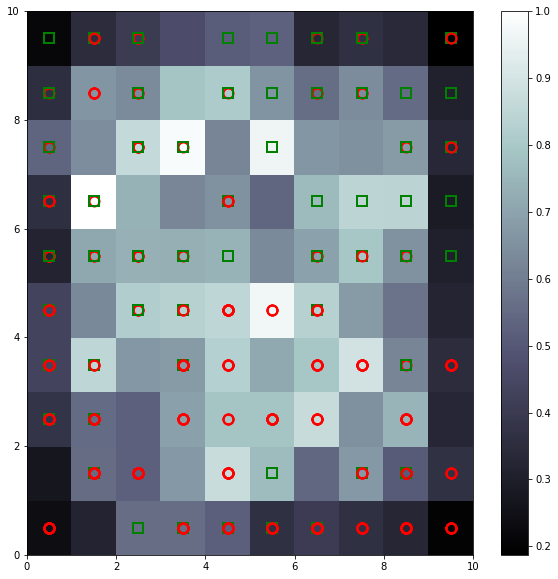

In [15]:
plt.figure(figsize=(10, 10))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

# for each data point finding the winning cluster after training
for i, x in enumerate(X):
    w = som.winner(x)

    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]],
         markerfacecolor='None', markersize=10, markeredgewidth=2)

show()


#### Finding out the fraud customers

In [16]:
mappings = som.win_map(X)

In [17]:
len(mappings.keys())

76

<p> Blacklisting the fraud applications which have been green-lit </p>

In [18]:
frauds = mappings[(4,2)] 

In [19]:
frauds = sc.inverse_transform(frauds)

In [20]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,30.25,5.500,2.0,4.0,4.0,5.500,0.0,0.0,0.0,1.0,1.0,100.0,1.0
1,0.0,45.00,4.585,2.0,4.0,8.0,1.000,0.0,0.0,0.0,1.0,1.0,240.0,1.0
2,0.0,22.50,0.415,2.0,3.0,4.0,0.335,0.0,0.0,0.0,1.0,1.0,144.0,1.0
